In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [277]:
titanic_ds = '../data_sets/titanic_ds.csv'

titanic_data = pd.read_csv(titanic_ds)

In [278]:
titanic_data.shape

(891, 12)

In [279]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [280]:
titanic_data = titanic_data.drop(columns=["Cabin", "Name","Ticket"], axis=1)

In [281]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [282]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [283]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [284]:
titanic_data['Age'].mean()

np.float64(29.69911764705882)

In [285]:
titanic_data['Embarked'].mode()[0]

'S'

In [286]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

C:\Users\rajun\AppData\Local\Temp\ipykernel_7772\1900912692.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
C:\Users\rajun\AppData\Local\Temp\ipykernel_7772\1900912692.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [287]:
titanic_data = titanic_data.replace({
    "Embarked": {
        "S": 0,
        "C": 1,
        "Q": 2
    },
    "Sex":{
        "male":0,
        'female':1
    }
})

C:\Users\rajun\AppData\Local\Temp\ipykernel_7772\436066227.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data = titanic_data.replace({


In [288]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [289]:
titanic_data.head(), titanic_data['Survived'].value_counts()

(   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 0            1         0       3    0  22.0      1      0   7.2500         0
 1            2         1       1    1  38.0      1      0  71.2833         1
 2            3         1       3    1  26.0      0      0   7.9250         0
 3            4         1       1    1  35.0      1      0  53.1000         0
 4            5         0       3    0  35.0      0      0   8.0500         0,
 Survived
 0    549
 1    342
 Name: count, dtype: int64)

<Axes: xlabel='Survived', ylabel='count'>

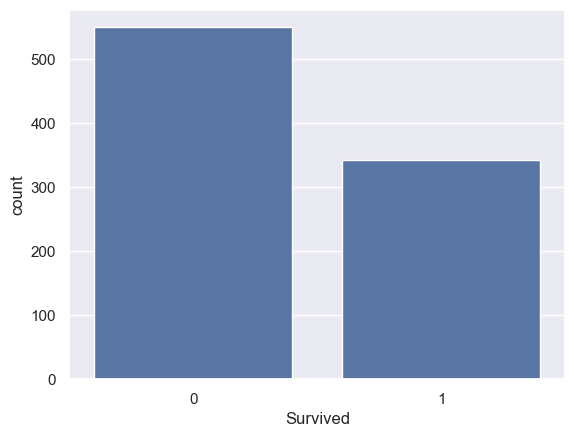

In [290]:
sns.set_theme()
sns.countplot(
    data=titanic_data,
    x ="Survived"
)

<Axes: xlabel='Sex', ylabel='count'>

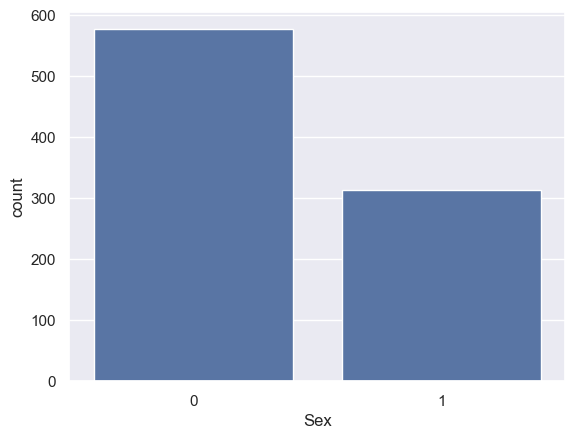

In [291]:
sns.countplot(
    x="Sex",
    data=titanic_data
)

<Axes: xlabel='Sex', ylabel='count'>

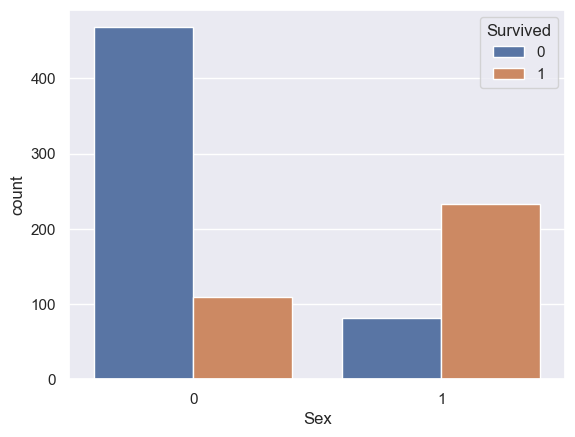

In [300]:
sns.countplot(x="Sex", hue="Survived", data=titanic_data)

In [292]:
X = titanic_data.drop(columns='Survived', axis=1)

Y = titanic_data['Survived']

In [293]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    train_size=0.8,
    stratify=Y,
    random_state=2
)

In [294]:
model = LogisticRegression()

In [295]:
model.fit(X_train, Y_train)

e:\learning\ML\projects\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [296]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
training_data_accuracy

0.8019662921348315

In [297]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
testing_data_accuracy

0.7988826815642458

In [298]:
input_data = (
1, 3, 0, 22.0, 1, 0, 7.2500,0,
)

input_data_array = np.asarray(input_data).reshape(1, -1)

prediction = model.predict(input_data_array)

if prediction[0] == 1:
    print("Survived")
else:
    print("Not Survived")

Not Survived


e:\learning\ML\projects\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
